In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans


In [2]:
df = pd.read_excel('/content/health_data_clean.xlsx')
df.head(5)

,Year,Month,District,Live_Births,ANC_Registrations,Early_ANC_Registrations,ANC_4_Checkups,Institutional_Deliveries,Home_Deliveries,Urban_Institutional_Deliveries,...,Institutional_Delivery_Rate,Immunization_Coverage,MMR,IMR,Urban_Delivery_Rate,Rural_Delivery_Rate,Rural_Urban_Gap,MMR_Score,IMR_Score,Composite_Health_Index
0,2024,Sep,Puri,359.0,712.0,507.0,156.0,257.0,102.0,131,...,71.587744,104.735376,139.275766,11.142061,74.431818,68.852459,5.579359,85.190344,74.558090,67.772364
1,2023,Mar,Koraput,452.0,458.0,339.0,214.0,366.0,106.0,208,...,77.542373,152.433628,331.858407,15.486726,87.029289,74.178404,12.850885,64.712389,63.092308,79.685335
2,2023,Nov,Sambalpur,496.0,550.0,328.0,343.0,453.0,43.0,200,...,91.330645,75.806452,403.225806,12.096774,94.786730,88.771930,6.014800,57.123656,72.038556,71.272613
3,2023,Nov,Puri,770.0,874.0,604.0,533.0,578.0,192.0,390,...,75.064935,94.415584,0.000000,14.285714,82.802548,62.876254,19.926294,100.000000,66.261836,74.871893
4,2024,Feb,Balasore,708.0,833.0,379.0,357.0,564.0,128.0,394,...,81.502890,95.338983,141.242938,12.711864,84.368308,70.539419,13.828889,84.981168,70.415303,66.277284


In [3]:
# Drop categorical cols
df_numeric = df.drop(columns=["Year", "Month", "District"], errors="ignore")

In [4]:
X = df_numeric.drop(columns=["Composite_Health_Index"])
y = df_numeric["Composite_Health_Index"]

In [5]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [8]:
importances =  pd.Series(rf.feature_importances_, index= X.columns).sort_values(ascending=False)
print("\nFeature Importances:\n", importances)


Feature Importances:
 ANC_Completion_Rate               0.417086
ANC_Care_Index                    0.296803
Immunization_Coverage             0.037561
Urban_Institutional_Deliveries    0.027148
ANC_Registrations                 0.021504
Institutional_Delivery_Rate       0.021050
ANC_4_Checkups                    0.020876
Children_Immunized                0.020755
Institutional_Deliveries          0.015743
Rural_Delivery_Rate               0.013058
Children_Eligible_0_11m           0.012582
Early_ANC_Registrations           0.011565
Urban_Delivery_Rate               0.011161
Live_Births                       0.009094
Infant_Deaths                     0.008452
MMR                               0.006854
IMR_Score                         0.006415
IMR                               0.006397
Home_Deliveries                   0.006366
Rural_Institutional_Deliveries    0.006014
Rural_Urban_Gap                   0.005767
Rural_Home_Deliveries             0.005642
MMR_Score                      

/tmp/ipython-input-972599333.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette="viridis")


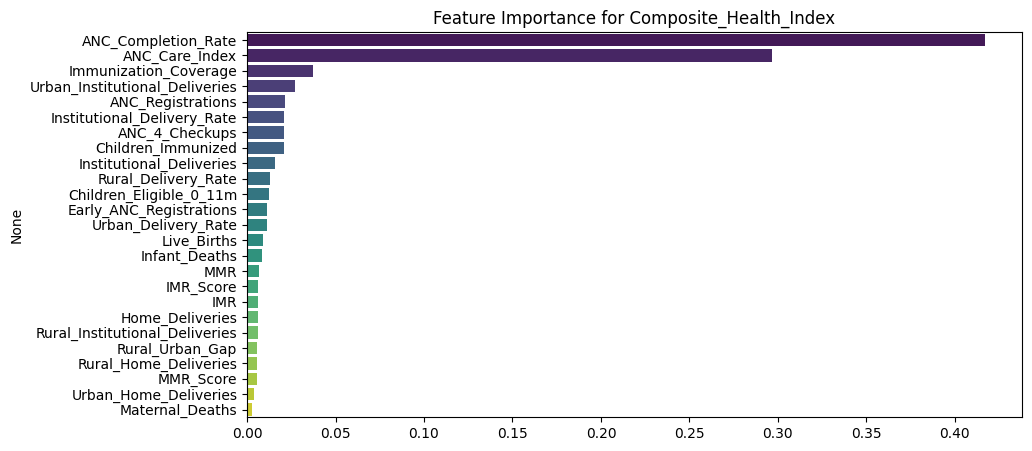

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x=importances.values, y=importances.index, palette="viridis")
plt.title("Feature Importance for Composite_Health_Index")
plt.show()

In [10]:
top_features = importances.head(4).index.tolist()
print("\nSelected Features for Clustering:", top_features)


Selected Features for Clustering: ['ANC_Completion_Rate', 'ANC_Care_Index', 'Immunization_Coverage', 'Urban_Institutional_Deliveries']


In [11]:
X_selected = df_numeric[top_features]


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


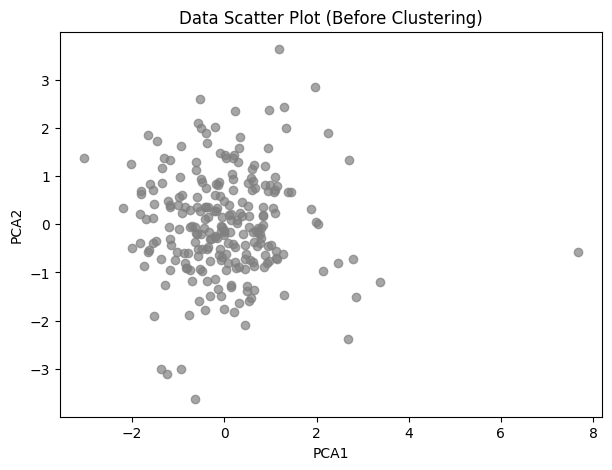

In [14]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c='grey', alpha=0.7)
plt.title("Data Scatter Plot (Before Clustering)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()


In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

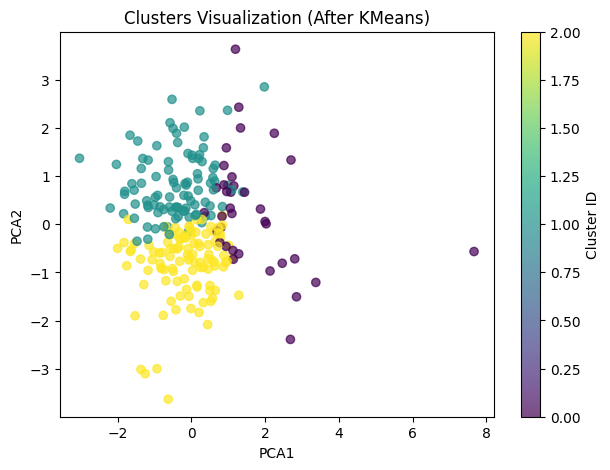

In [16]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="viridis", alpha=0.7)
plt.title("Clusters Visualization (After KMeans)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Cluster ID")
plt.show()

In [18]:
df["Cluster"] = clusters

In [19]:
print("\nCluster Assignment per District:\n")
print(df[["District", "Cluster"]].sort_values("Cluster"))


Cluster Assignment per District:

       District  Cluster
1       Koraput        0
6      Balasore        0
11      Koraput        0
27     Rourkela        0
46   Mayurbhanj        0
..          ...      ...
215    Rourkela        2
214     Koraput        2
228    Balasore        2
231     Koraput        2
239    Balasore        2

[240 rows x 2 columns]


In [23]:
for i in range(3):
    cluster_districts = df[df["Cluster"] == i]["District"].tolist()
    print(f"\nCluster {i} Districts:", cluster_districts)
    print(f"Cluster {i} Mean Values:\n", df_numeric[clusters == i][top_features].mean())


Cluster 0 Districts: ['Koraput', 'Balasore', 'Koraput', 'Rourkela', 'Cuttack', 'Mayurbhanj', 'Cuttack', 'Rourkela', 'Cuttack', 'Balasore', 'Rourkela', 'Mayurbhanj', 'Cuttack', 'Rourkela', 'Sambalpur', 'Sambalpur', 'Koraput', 'Kendrapara', 'Koraput', 'Mayurbhanj', 'Puri', 'Koraput', 'Cuttack', 'Balasore', 'Sambalpur', 'Berhampur', 'Puri', 'Sambalpur', 'Berhampur', 'Mayurbhanj', 'Puri', 'Berhampur', 'Balasore', 'Sambalpur', 'Sambalpur']
Cluster 0 Mean Values:
 ANC_Completion_Rate                89.199883
ANC_Care_Index                     66.922238
Immunization_Coverage             109.528627
Urban_Institutional_Deliveries    249.314286
dtype: float64

Cluster 1 Districts: ['Puri', 'Balasore', 'Kendrapara', 'Bhubaneswar', 'Kendrapara', 'Cuttack', 'Cuttack', 'Kendrapara', 'Berhampur', 'Balasore', 'Berhampur', 'Rourkela', 'Kendrapara', 'Mayurbhanj', 'Bhubaneswar', 'Balasore', 'Berhampur', 'Berhampur', 'Kendrapara', 'Koraput', 'Sambalpur', 'Rourkela', 'Sambalpur', 'Puri', 'Puri', 'Mayurbha